# Dataset 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn-pastel')

%matplotlib inline


In [2]:
# Read 
df = pd.read_csv('synthdata2.csv')
df.head()


,Marca temporal,Gender,Age,Which of the following types of cozy games have you played in the past month? (choose all that apply),How often do you play cozy games?,How do you typically discover new cozy games to play?,How much time do you spend playing cozy games in a typical week?,How much money have you spent on in-game purchases in the past month?,Which of the following in-game purchases have you made in the past month? (choose all that apply),How important are the following features when deciding whether to play a cozy game? [Engaging storyline],How important are the following features when deciding whether to play a cozy game? [Attractive graphics],How important are the following features when deciding whether to play a cozy game? [Relaxing atmosphere],How important are the following features when deciding whether to play a cozy game? [Social interactions with other players],How important are the following features when deciding whether to play a cozy game? [Challenging gameplay],Have you ever recommended a cozy game to a friend or family member?,How likely are you to continue playing a cozy game after completing all available levels or content?,What role does music play in cozy games for you?,Which of the following devices do you use to play cozy games? (Select all that apply),"What are some of your favorite cozy games, and why do you enjoy playing them? (Please describe briefly)"
0,2023/05/03 3:01:47 a. m. GMT-4,Male,26-30,Simulation games,Weekly,Online reviews and ratings,2-5 hours,$10-$25,None,Important,Somewhat Important,Important,Important,Regular,Yes,Somewhat Likely,It helps me relax and focus,Mobile Phone,NaN
1,2023/04/06 12:48:52 a. m. GMT-4,Male,41-45,Casual games,Occasionally,Word of mouth,2-5 hours,$0,Other,Regular,Important,Very Important,Important,Not Important,No,Neutral,"I appreciate the music, but it is not essentia...",Other,Endless Ocean (love the feel of water/swimming...
2,2023/04/07 12:17:24 a. m. GMT-4,Female,26-30,Casual games;Simulation games,Weekly,Social media recommendations;Word of mouth;Onl...,1-2 hours,$0,Cosmetics or skins,Regular,Very Important,Important,Not Important,Very Important,Yes,Somewhat Likely,It is essential to my gaming experience,PC/Laptop,"Animal crossing, is relaxing and addictive. Al..."
3,2023/04/06 2:04:56 p. m. GMT-4,Female,21-25,Simulation games,Weekly,Word of mouth,2-5 hours,$0,None,Important,Very Important,Very Important,Important,Regular,No,Very Likely,"I appreciate the music, but it is not essentia...",PC/Laptop;Gaming Console,"I think I was emailed the wrong survey, I excl..."
4,2023/04/09 12:17:00 a. m. GMT-4,Female,26-30,Other,Weekly,Online reviews and ratings,2-5 hours,Less than $10,Virtual currency,Not Important,Very Important,Important,Important,Important,Yes,Neutral,It helps me relax and focus,PC/Laptop;Gaming Console,NaN


In [3]:
#Renaming columns

df.rename(columns ={df.columns[0] : 'Date_stamp', df.columns[3] :'Game_Category', 
                     df.columns[4] :'Gaming_Frequency', df.columns[5] :'Game_Discovery',
                    df.columns[6] : 'Weekly_Gaming_Time', df.columns[7] : 'Game_Purchase',
                    df.columns[8] : 'Game_Purchase_Category', df.columns[9] : 'Storyline_Rating', 
                    df.columns[10] :'Graphics_Rating', df.columns[11] : 'Atmosphere_Rating',
                    df.columns[12] : 'Coplay_Rating', df.columns[13] : 'Gameplay_Rating', 
                    df.columns[14] : 'Recommendation', df.columns[15] : 'Game_Likelihood',
                    df.columns[16] : 'Music_Role', df.columns[17] : 'Device',
                    df.columns[18] :'Game_Names'}, inplace = True)

df.head()

,Date_stamp,Gender,Age,Game_Category,Gaming_Frequency,Game_Discovery,Weekly_Gaming_Time,Game_Purchase,Game_Purchase_Category,Storyline_Rating,Graphics_Rating,Atmosphere_Rating,Coplay_Rating,Gameplay_Rating,Recommendation,Game_Likelihood,Music_Role,Device,Game_Names
0,2023/05/03 3:01:47 a. m. GMT-4,Male,26-30,Simulation games,Weekly,Online reviews and ratings,2-5 hours,$10-$25,None,Important,Somewhat Important,Important,Important,Regular,Yes,Somewhat Likely,It helps me relax and focus,Mobile Phone,NaN
1,2023/04/06 12:48:52 a. m. GMT-4,Male,41-45,Casual games,Occasionally,Word of mouth,2-5 hours,$0,Other,Regular,Important,Very Important,Important,Not Important,No,Neutral,"I appreciate the music, but it is not essentia...",Other,Endless Ocean (love the feel of water/swimming...
2,2023/04/07 12:17:24 a. m. GMT-4,Female,26-30,Casual games;Simulation games,Weekly,Social media recommendations;Word of mouth;Onl...,1-2 hours,$0,Cosmetics or skins,Regular,Very Important,Important,Not Important,Very Important,Yes,Somewhat Likely,It is essential to my gaming experience,PC/Laptop,"Animal crossing, is relaxing and addictive. Al..."
3,2023/04/06 2:04:56 p. m. GMT-4,Female,21-25,Simulation games,Weekly,Word of mouth,2-5 hours,$0,None,Important,Very Important,Very Important,Important,Regular,No,Very Likely,"I appreciate the music, but it is not essentia...",PC/Laptop;Gaming Console,"I think I was emailed the wrong survey, I excl..."
4,2023/04/09 12:17:00 a. m. GMT-4,Female,26-30,Other,Weekly,Online reviews and ratings,2-5 hours,Less than $10,Virtual currency,Not Important,Very Important,Important,Important,Important,Yes,Neutral,It helps me relax and focus,PC/Laptop;Gaming Console,NaN


In [4]:
#Mapping current rating values to numeric values
map_gr_val = {'Not Important': 1,'Somewhat Important': 2,'Regular': 3,'Important': 4,'Very Important': 5}

#Replacing values
df['Graphics_Rating'] = df['Graphics_Rating'].replace(map_gr_val)

#replace SR
map_sr_val = {'Not Important': 1,'Somewhat Important': 2,'Regular': 3,'Important': 4,'Very Important': 5}

#Replacing values SR
df['Storyline_Rating'] = df['Storyline_Rating'].replace(map_sr_val)

#replace AR
map_ar_val = {'Not Important': 1,'Somewhat Important': 2,'Regular': 3,'Important': 4,'Very Important': 5}

#Replacing values AR
df['Atmosphere_Rating'] = df['Atmosphere_Rating'].replace(map_ar_val)

#replace CR
map_cr_val = {'Not Important': 1,'Somewhat Important': 2,'Regular': 3,'Important': 4,'Very Important': 5}

#Replacing values CR
df['Coplay_Rating'] = df['Coplay_Rating'].replace(map_cr_val)

#replace GPR
map_gpr_val = {'Not Important': 1,'Somewhat Important': 2,'Regular': 3,'Important': 4,'Very Important': 5}

#Replacing values GPR
df['Gameplay_Rating'] = df['Gameplay_Rating'].replace(map_gpr_val)


In [5]:
df['Gender'].unique()

array(['Male', 'Female', 'Male;Non-Binary'], dtype=object)

In [6]:
map_gen_val = {'Male;Non-Binary': 'Other'}
df['Gender'] = df['Gender'].replace(map_gen_val)

In [7]:
#Missing Data
df.isnull().mean()*100

Date_stamp                 0.0
Gender                     0.0
Age                        0.0
Game_Category              0.0
Gaming_Frequency           0.0
Game_Discovery             0.0
Weekly_Gaming_Time         0.0
Game_Purchase              0.0
Game_Purchase_Category     0.0
Storyline_Rating           0.0
Graphics_Rating            0.0
Atmosphere_Rating          0.0
Coplay_Rating              0.0
Gameplay_Rating            0.0
Recommendation             0.0
Game_Likelihood            0.0
Music_Role                 0.0
Device                     0.0
Game_Names                24.4
dtype: float64

In [8]:
#Column Data Types
df.dtypes

Date_stamp                object
Gender                    object
Age                       object
Game_Category             object
Gaming_Frequency          object
Game_Discovery            object
Weekly_Gaming_Time        object
Game_Purchase             object
Game_Purchase_Category    object
Storyline_Rating           int64
Graphics_Rating            int64
Atmosphere_Rating         object
Coplay_Rating              int64
Gameplay_Rating           object
Recommendation            object
Game_Likelihood           object
Music_Role                object
Device                    object
Game_Names                object
dtype: object

In [9]:
#Data Wrangling
#pd.set_option('display.max_rows', none ) this is to see ALL data



In [11]:
print(np.unique(df[['Age', 'Weekly_Gaming_Time']].values))

['1-2 hours' '16-20' '2-5 hours' '21-25' '26-30' '31-35' '36-40' '41-45'
 'Less than 1 hour' 'More than 10 hours']


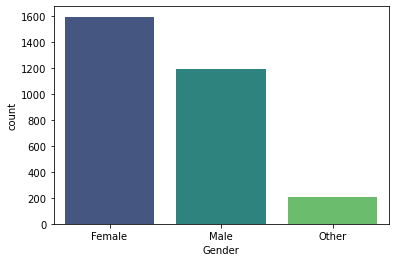

In [12]:
sns.countplot(x='Gender',data=df, order = df['Gender'].value_counts().index ,palette='viridis')

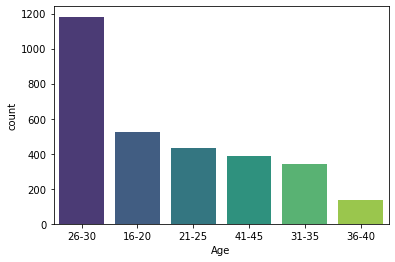

In [13]:
sns.countplot(x='Age',data=df,order=df['Age'].value_counts().index, palette='viridis')


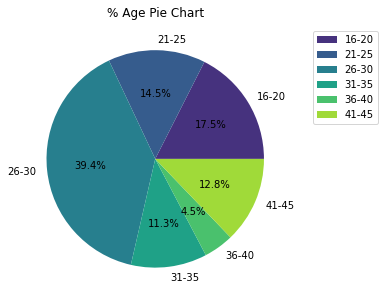

In [14]:
age_counts = df.groupby('Age').count()
palette = sns.color_palette('viridis')

age_counts.plot.pie(y='Gender',figsize=(5,5),autopct='%1.1f%%',colors=palette)
plt.title('% Age Pie Chart')
plt.gca().set_ylabel('')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.8)
plt.show()

In [15]:
#Heat maps by age
h_map_age = df.groupby(by=['Age','Graphics_Rating']).count()['Gender'].unstack().sort_index(axis=0, level='Graphics_Rating',ascending=True)


#Het map by gender
h_map_gender = df.groupby(by=['Gender','Graphics_Rating']).count()['Age'].unstack().sort_index(axis=0, level='Graphics_Rating',ascending=True)



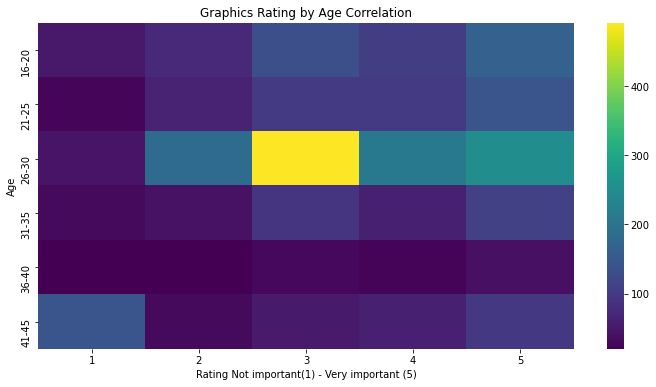

In [16]:
#Heat map How important are graphic Ratings by Age 
plt.figure(figsize=(12,6))
sns.heatmap(h_map_age,cmap='viridis')
plt.xlabel('Rating Not important(1) - Very important (5)')
plt.ylabel('Age')


plt.title('Graphics Rating by Age Correlation')
plt.show()

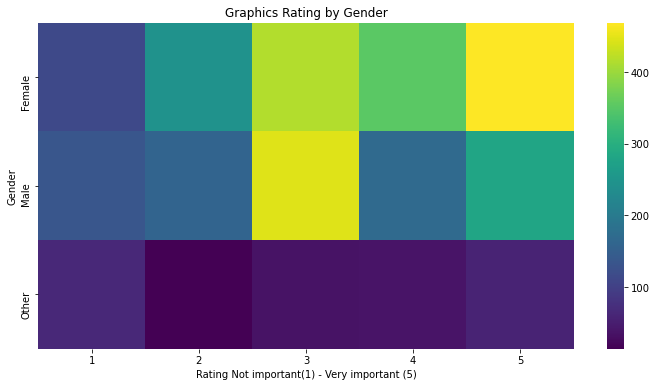

In [17]:
#Heat map How important are graphic Ratings by Age 
plt.figure(figsize=(12,6))
sns.heatmap(h_map_gender,cmap='viridis')
plt.xlabel('Rating Not important(1) - Very important (5)')
plt.ylabel('Gender')


plt.title('Graphics Rating by Gender')
plt.show()

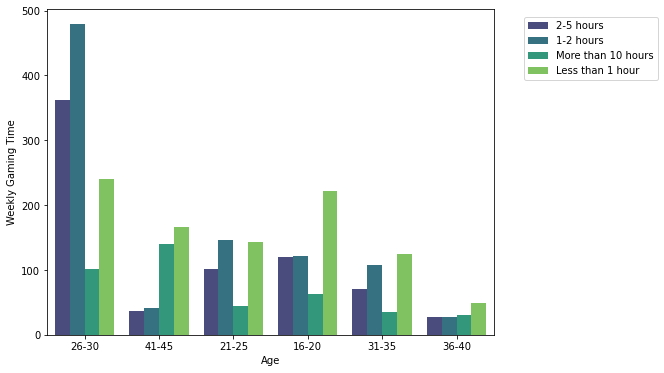

In [18]:
plt.figure(figsize=(8,6))
sns.countplot(x='Age',data=df,hue='Weekly_Gaming_Time', palette='viridis')

# Relocating legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.8)
plt.ylabel('Weekly Gaming Time')
plt.show()

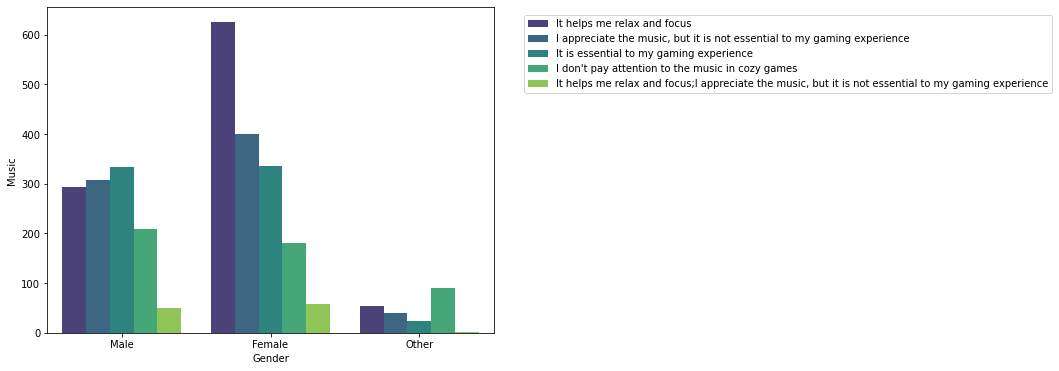

In [71]:
#MUSIC 

plt.figure(figsize=(8,6))
sns.countplot(x='Gender',data=df,hue='Music_Role', palette='viridis')

# Relocating legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.8)
plt.ylabel('Music')
plt.show()

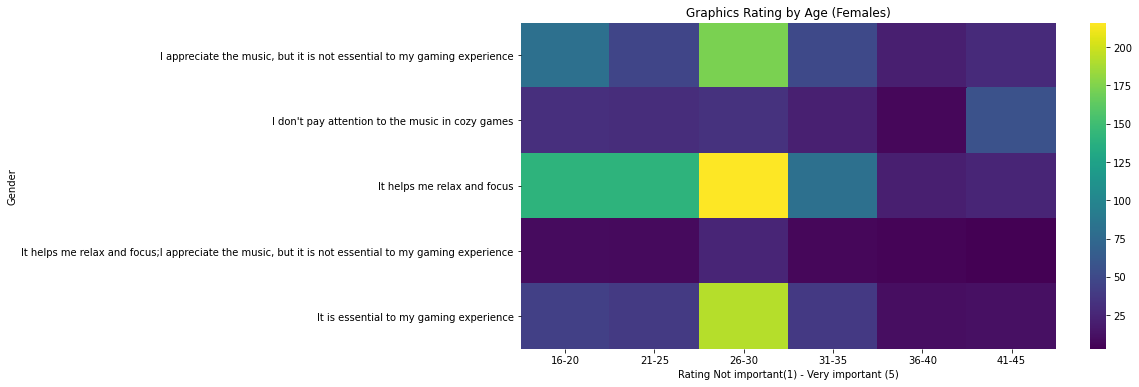

In [76]:
#MUSIC 

female_filter = df[df['Gender'] == 'Female']

h_map_female = female_filter.groupby(by=['Music_Role','Age']).count()['Gender'].unstack()

plt.figure(figsize=(12,6))
sns.heatmap(h_map_female,cmap='viridis')
plt.xlabel('Rating Not important(1) - Very important (5)')
plt.ylabel('Gender')


plt.title('Graphics Rating by Age (Females)')
plt.show()

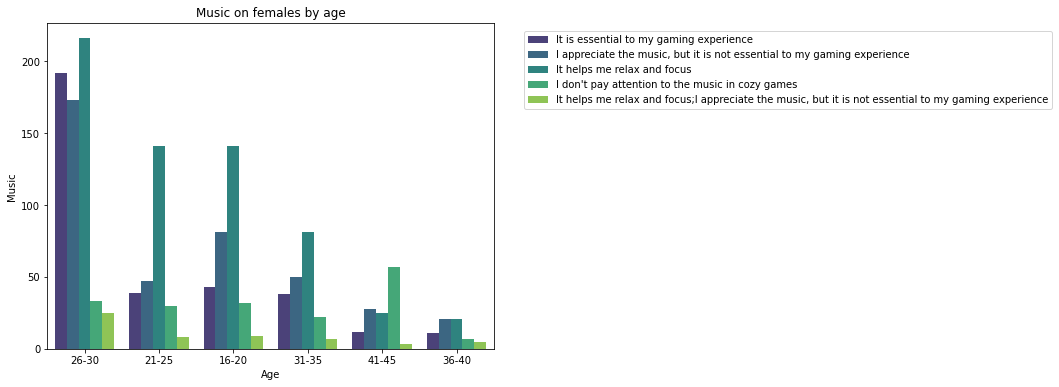

In [79]:
#MUSIC

plt.figure(figsize=(8,6))
sns.countplot(x='Age',data=female_filter,hue='Music_Role', palette='viridis')

# Relocating legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.8)
plt.ylabel('Music')
plt.title('Music on females by age')
plt.show()

In [69]:

#Most popular Ratings related to cozy gaming: Would you think these ratings are important for the gameplay?
#Rating 1 being not important to 5 being Very important 
print("\033[1m" + "Most Popular Rating Values:" + "\033[0m")
print('')
# do a box with IF value = 1 Not important (ratings).....

#Storyline
max_story = df['Storyline_Rating'].value_counts().max()
max_story_id = df['Storyline_Rating'].value_counts().idxmax()
print('Storyline Rating:')
if max_story_id == 5:
    print ('\033[1mVery Important!\033[0m','Maxval:', max_story)
elif max_story_id == 4:
    print ('\033[1mImportant!\033[0m','Maxval', max_story)
elif max_story_id == 3:
    print ('\033[1mSomewhat Important!\033[0m','Maxval:', max_story)
elif max_story_id == 2:
    print ('\033[1mRegular\033[0m','Maxval:', max_story)  
else:
    print ('\033[1mNotImportant:(\033[0m','Maxval:', max_story)   

#Coplay
max_coplay = df['Coplay_Rating'].value_counts().max()
max_coplay_id = df['Coplay_Rating'].value_counts().idxmax()
print ('Coplay Rating:',max_coplay_id,'\033[1mMaxval:\033[0m', max_coplay)

#Atmosphere
max_atmosphere = df['Atmosphere_Rating'].value_counts().max()
max_atmosphere_id = df['Atmosphere_Rating'].value_counts().idxmax()
print ('Atmosphere Rating:',max_atmosphere_id,'\033[1mMaxval:\033[0m', max_atmosphere)

#Gameplay (challenge)
max_gameplay = df['Gameplay_Rating'].value_counts().max()
max_gameplay_id = df['Gameplay_Rating'].value_counts().idxmax()
print ('Gameplay Rating:',max_gameplay_id,'\033[1mMaxval:\033[0m', max_gameplay)

Most Popular Rating Values:

Storyline Rating:
Very Important! Maxval: 900
Coplay Rating: 1 Maxval: 1318
Atmosphere Rating: 5 Maxval: 1351
Gameplay Rating: 3 Maxval: 987
